In [4]:
import pickle

import pandas as pd
import numpy as np

from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import Amplitude

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
plt.style.use("ggplot")

In [6]:
with open("data/02-preprocessed/data.pickle", "rb") as file:
    data = pickle.load(file)

In [7]:
key = pd.read_pickle("data/02-preprocessed/key.pickle")

In [44]:
amplitude_0 = key.copy() # H_0 persistent norm 
amplitude_1 = key.copy() # H_1 persistent norm 

In [11]:
rips = VietorisRipsPersistence(homology_dimensions=[0, 1])

In [45]:
amp = Amplitude()

for j, samples in enumerate(data):
    
    diagrams = rips.fit_transform(samples)
    amps = amp.fit_transform(diagrams)

    amplitude_0.iloc[:, j] = amps[:, 0]
    amplitude_1.iloc[:, j] = amps[:, 1]

In [46]:
amplitude_0.shape

(21, 26)

[]

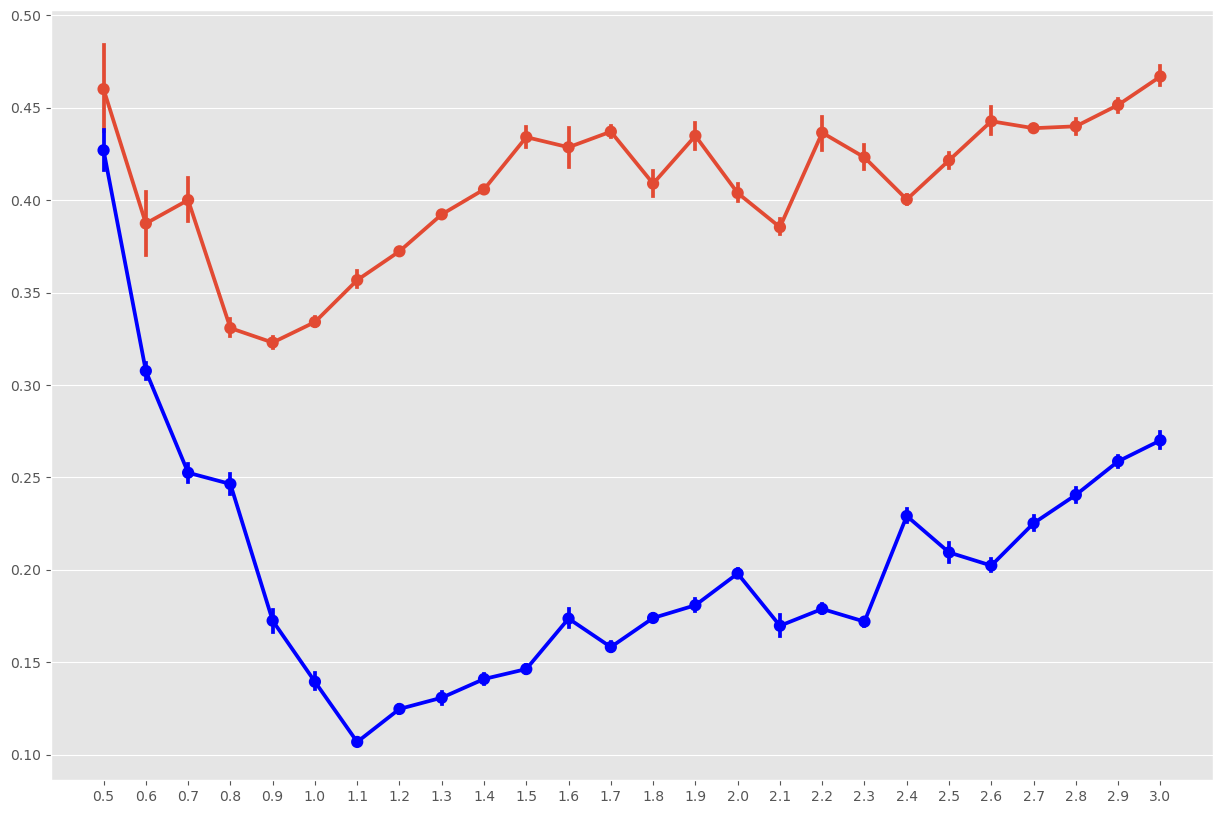

In [71]:
plt.figure(figsize=(15, 10))
sns.pointplot(amplitude_0)
sns.pointplot(amplitude_1, color="blue")
plt.xticks(range(amplitude_0.shape[1]), 
           np.round(amplitude_0.columns.get_level_values(1), 1))
plt.plot()

Amplitude decreases until around n_b = 1, after which it increases. One  
interpretation of the above plot is that the repulsive force is dominant  
until around n_b = 1. 

In [22]:
def magnitude(diagram):
    magnitude = (-1) ** diagram[:, 2] 
    magnitude *= np.exp(-diagram[:, 0]) - np.exp(-diagram[:, 1])
    magnitude = np.sum(magnitude)
    return magnitude

In [26]:
magnitude_df = key.copy()

In [27]:
for j, samples in enumerate(data):
    
    diagrams = rips.fit_transform(samples)
    for i, diagram in enumerate(diagrams):
        magnitude_df.iloc[i, j] = magnitude(diagram)

[]

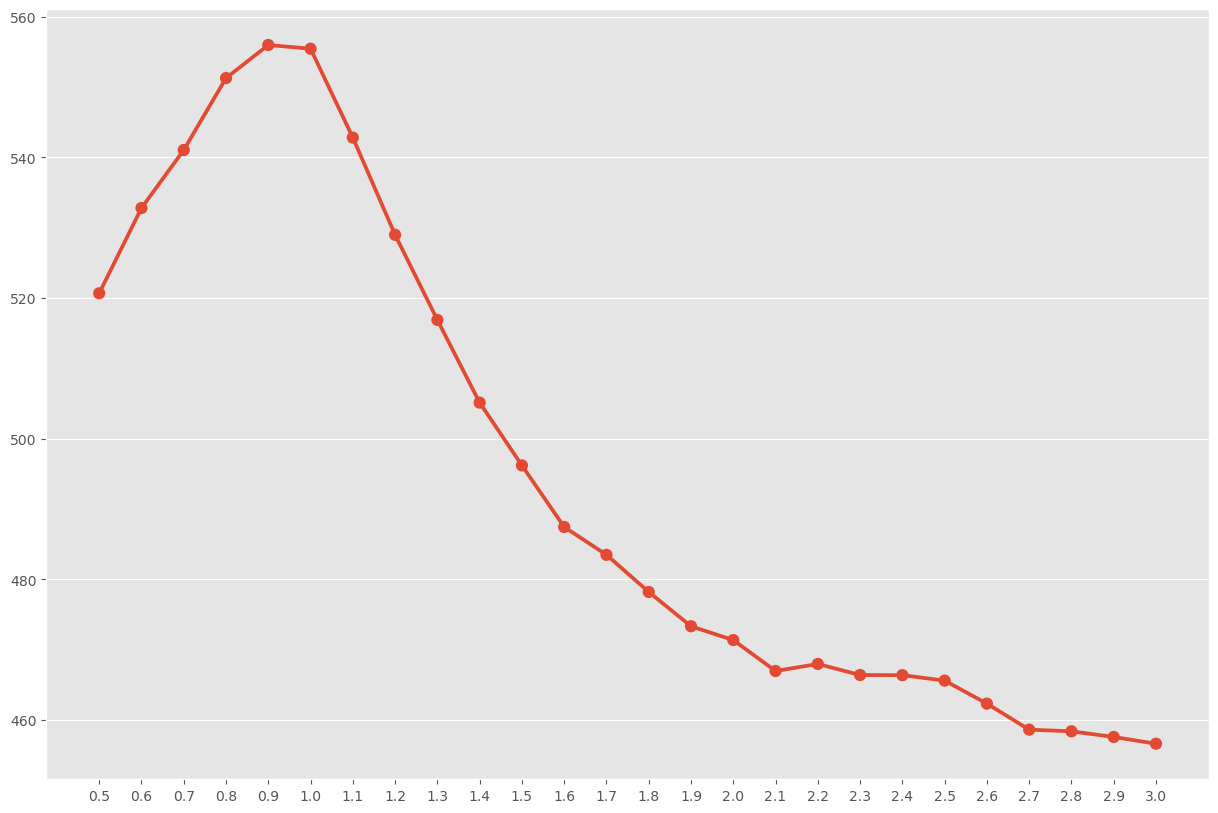

In [28]:
plt.figure(figsize=(15, 10))
sns.pointplot(magnitude_df)
plt.xticks(range(magnitude_df.shape[1]), 
           np.round(magnitude_df.columns.get_level_values(1), 1))
plt.plot()

Similarly, magnitude reaches a maximum at 1.0.